In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


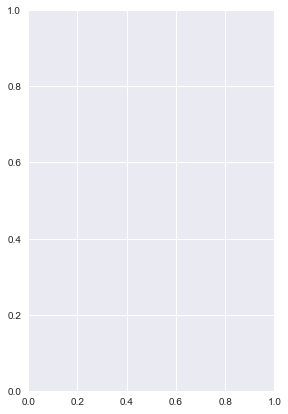

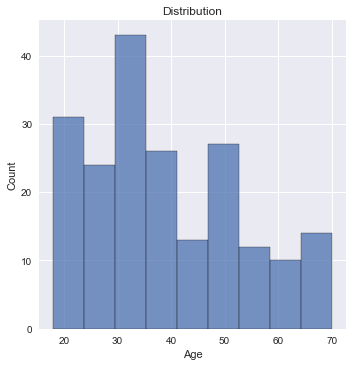

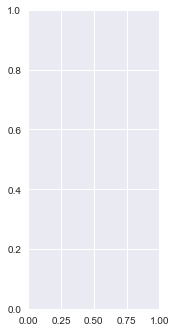

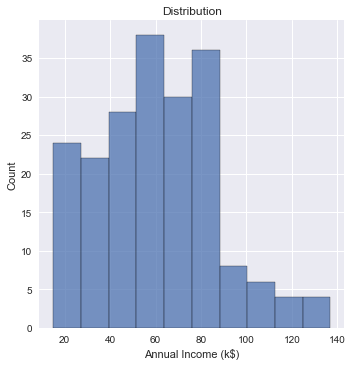

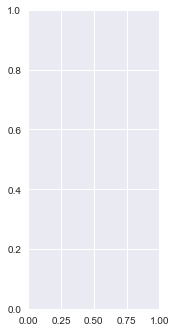

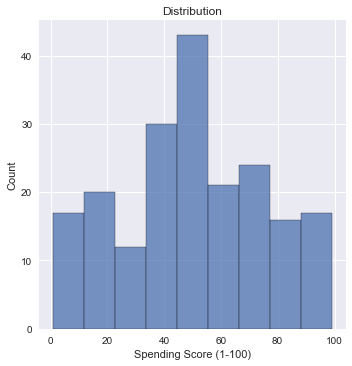

In [5]:
plt.style.use('seaborn')
plt.figure(figsize=(15,7))

n=0
for i in data.columns[2:]:
    n+=1
    plt.subplot(1,3,n)
    sns.displot(data[i])
    plt.title(f'Distribution')
    plt.show()

# K Means Clustering

In [6]:
# Finding number of kluster dengan elbow method
df = data.copy()
df.iloc[:, 3:]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [7]:
inertia = []
for i in range(1,10):
    model = KMeans(n_clusters=i, random_state=42)
    model.fit(df.iloc[:, 3:])
    inertia.append(model.inertia_)
inertia

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562]

In [8]:
inertia_df = pd.DataFrame({'Inertia':inertia}, index=[i for i in range(1,10)])
inertia_df

,Inertia
1,269981.280000
2,181363.595960
3,106348.373062
4,73679.789039
5,44448.455448
6,37265.865205
7,30241.343618
8,25336.946861
9,21850.165283


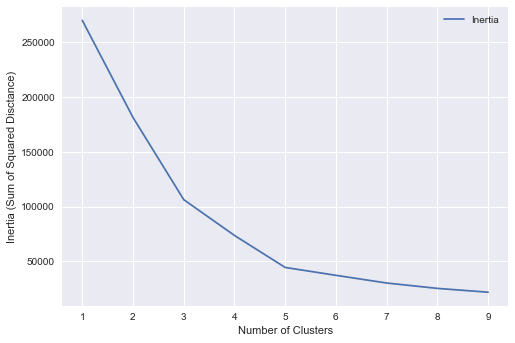

In [9]:
inertia_df.plot(kind='line')
plt.ylabel('Inertia (Sum of Squared Disctance)')
plt.xlabel('Number of Clusters')
plt.show()

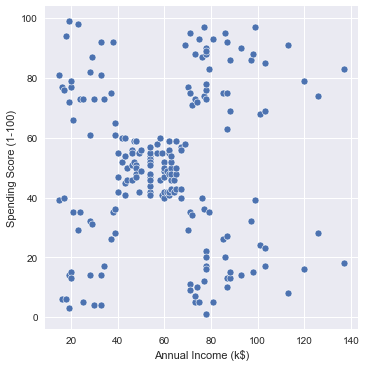

In [10]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

# Fitting Model KMeans

In [11]:
modelKM = KMeans(n_clusters=5, random_state=42)
modelKM.fit(df.iloc[:, 3:])

KMeans(n_clusters=5, random_state=42)

In [12]:
modelKM.predict(df.iloc[:, 3:])

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

In [13]:
df['Clusters'] = modelKM.predict(df.iloc[:, 3:])

In [14]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,0
2,3,Female,20,16,6,3
3,4,Female,23,16,77,0
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


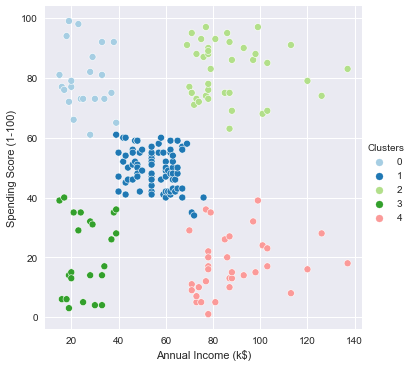

In [15]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Clusters', palette = 'Paired')

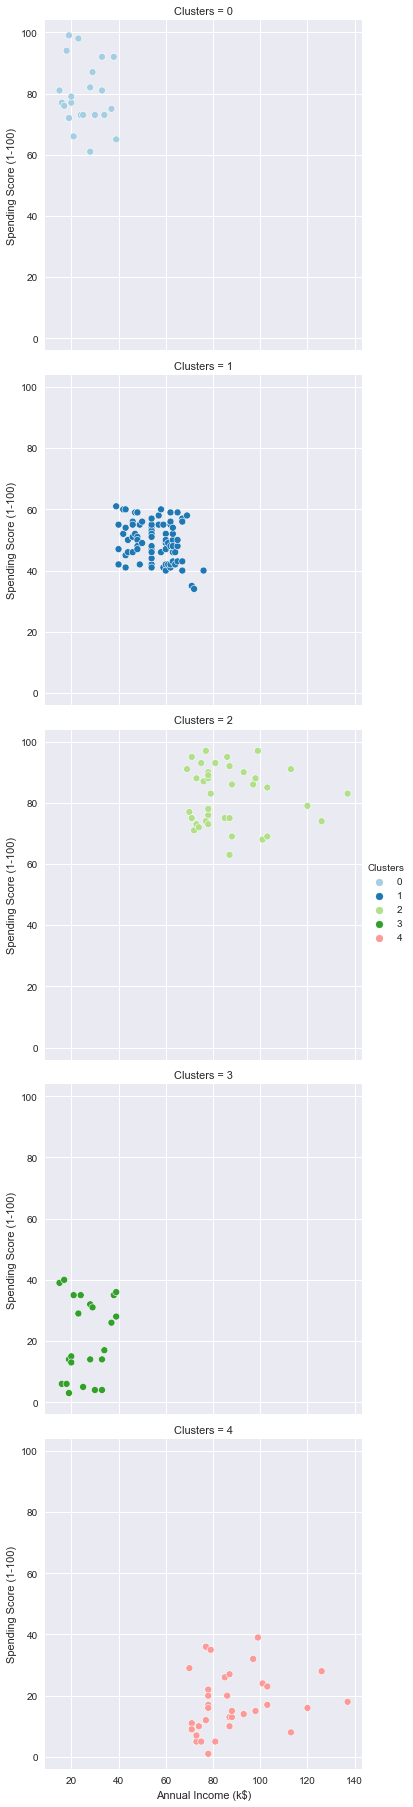

In [16]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Clusters', palette = 'Paired', row='Clusters')

In [17]:
modelKM.cluster_centers_

array([[25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348],
       [88.2       , 17.11428571]])

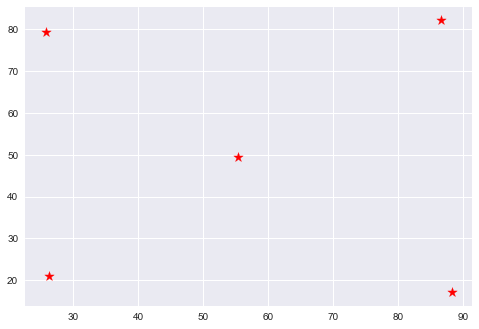

In [18]:
plt.scatter(modelKM.cluster_centers_[:,0], modelKM.cluster_centers_[:,1], 
           color='red', marker='*', s=100)

# Hierarical Histogram

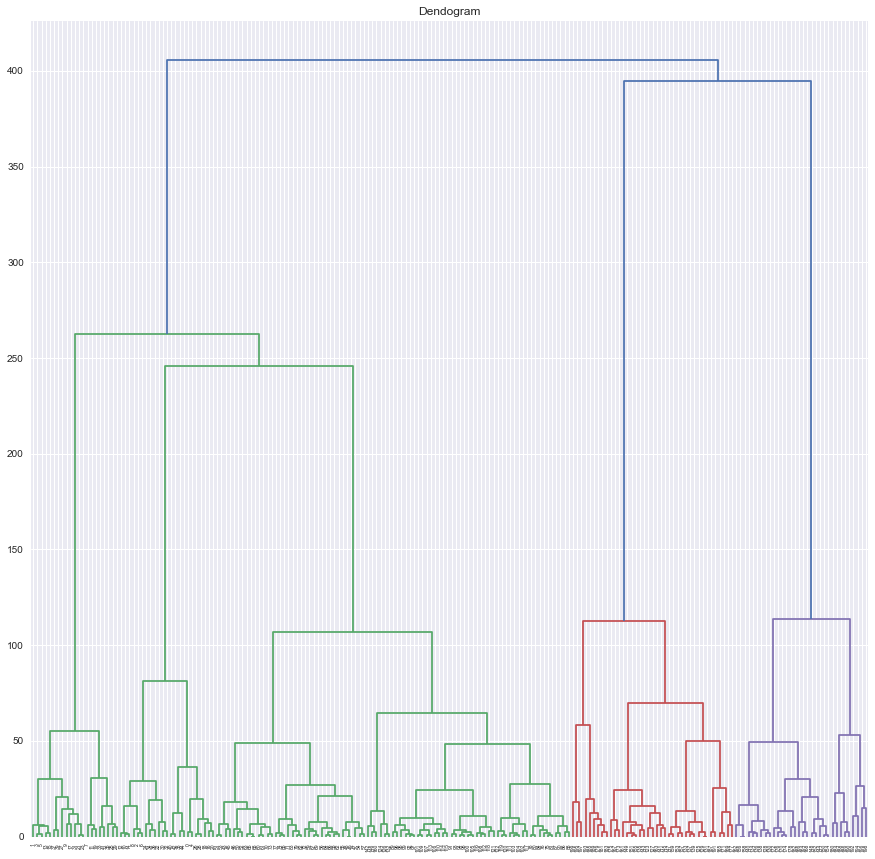

In [19]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,15))
plt.title('Dendogram')

dend = sch.dendrogram(sch.linkage(df.iloc[:,3:5], method='ward'))

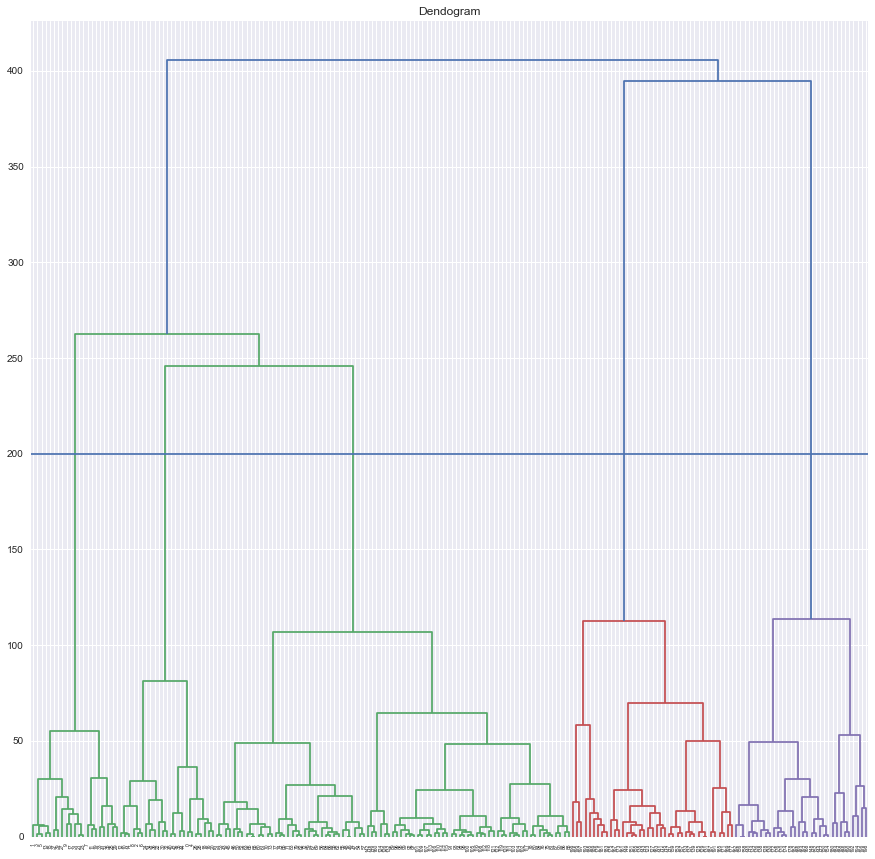

In [20]:
plt.figure(figsize=(15,15))
plt.title('Dendogram')
plt.axhline(y=200)
dend = sch.dendrogram(sch.linkage(df.iloc[:,3:5], method='ward'))

In [21]:
from sklearn.cluster import AgglomerativeClustering as AC

cluster = AC(n_clusters=5)

In [22]:
cluster.fit_predict(df.iloc[:,3:5])

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [23]:
df.rename(columns={'Clusters': 'Cluster KMeans'}, inplace=True)
df['Cluster AC'] = cluster.fit_predict(df.iloc[:,3:5])

In [24]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster KMeans,Cluster AC
0,1,Male,19,15,39,3,4
1,2,Male,21,15,81,0,3
2,3,Female,20,16,6,3,4
3,4,Female,23,16,77,0,3
4,5,Female,31,17,40,3,4
...,...,...,...,...,...,...,...
195,196,Female,35,120,79,2,2
196,197,Female,45,126,28,4,0
197,198,Male,32,126,74,2,2
198,199,Male,32,137,18,4,0


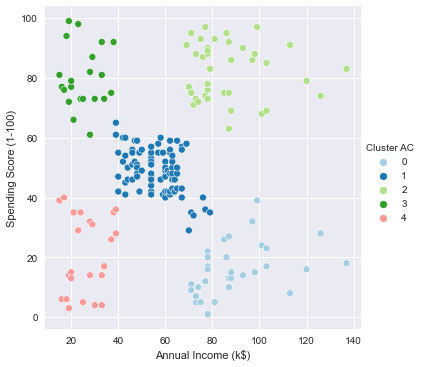

In [25]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster AC', palette = 'Paired')

In [28]:
df.iloc[:, 3:5]

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


# Evaluation Metrics For Clustering

In [26]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

silhouette_kmeans = silhouette_score(df.iloc[:, 3:5], df['Cluster KMeans'])
silhouette_ac = silhouette_score(df.iloc[:, 3:5], df['Cluster AC'])

calinski_kmeans = calinski_harabasz_score(df.iloc[:, 3:5], df['Cluster KMeans'])
calinski_ac = calinski_harabasz_score(df.iloc[:, 3:5], df['Cluster AC'])

davies_kmeans = davies_bouldin_score(df.iloc[:, 3:5], df['Cluster KMeans'])
davies_ac = davies_bouldin_score(df.iloc[:, 3:5], df['Cluster AC'])



In [27]:
model_selection = pd.DataFrame({'KMeans':[silhouette_kmeans, calinski_kmeans, davies_kmeans],
                               'Hierarical':[silhouette_ac, calinski_ac, davies_ac]})

# Cluster Exploration

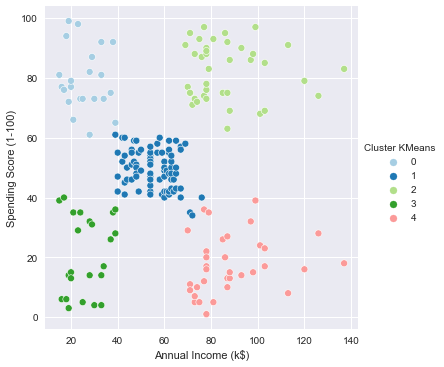

In [51]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster KMeans', palette = 'Paired')